In [57]:
import sys
import tensorflow as tf
sys.path.append('D:/Math PhD/PINNs code and papers/PINNs')   
from Network import Network
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [ ]:
steps=10000
lr=1e-1
layers = np.array([2,20,20,20,20,20,20,20,20,1]) #8 hidden layers
#Nu: Number of training points # Nf: Number of collocation points (Evaluate PDE)
N_u = 100 #Total number of data points for 'u'
N_f = 10_000 #Total number of collocation points 
nu = 0.01/np.pi #diffusion coeficient

$$\frac{\partial u}{\partial t}+ u\frac{\partial u}{\partial x}=\nu\frac{\partial^2 u}{\partial x^2} $$

$$x\in[-1,1]$$
$$t\in[0,1]$$


In [23]:
model = Network([2,1,1]).build()

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
 dense_7 (Dense)             (None, 1)                 1         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.trainable_weights

[<tf.Variable 'dense_6/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.57802427],
        [1.0108093 ]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Variable 'dense_7/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.02487032]], dtype=float32)>]

In [14]:
n = 5
# Interior data t \in [0,1], x \in [-1,1]
data_int = np.random.rand(n, 2)
data_int[..., 1] = data_int[..., 1]*2 - 1
data_int = tf.Variable(data_int, trainable=False, dtype="float32")

In [15]:
# three derivatives to compute: du_dt, du_dx, du2_dxdx

In [46]:
def pde_loss(model, data):
    # Error given by the PDE over data.
    n = data.shape[0]
    with tf.GradientTape() as tape2:
        tape2.watch(data)
        with tf.GradientTape() as tape1:
            tape1.watch(data)
            u = model(data)
        u_z = tape1.gradient(u, data)
    u_zz = tape2.gradient(u_z, data)
    u_t = tf.reshape(u_z[...,0], shape=(n,1))
    u_x = tf.reshape(u_z[...,1], shape=(n,1))
    u_xx = tf.reshape(u_zz[...,1], shape=(n,1))
    return tf.reduce_mean(tf.math.square(u_t + u*u_x - (0.01/np.pi)*u_xx))

In [47]:
u, u_t, u_x, u_xx = pde_loss(model, data_int)

In [54]:
u_xx

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[-0.01305875],
       [-0.0307433 ],
       [ 0.03074728],
       [-0.02847021],
       [-0.02645485]], dtype=float32)>

In [41]:
x = tf.Variable(np.array([[1.,1.], [1.,0.]]))
print(x, tf.reduce_sum(tf.square(x), axis=1))

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float64, numpy=
array([[1., 1.],
       [1., 0.]])> tf.Tensor([2. 1.], shape=(2,), dtype=float64)


In [42]:
with tf.GradientTape() as tape2:
    tape2.watch(x)
    with tf.GradientTape() as tape1:
        tape1.watch(x)
        u = tf.reduce_sum(tf.square(x), axis=1)
    u_z = tape1.gradient(u, x)
u_zz = tape2.gradient(u_z, x)

In [43]:
u_z

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[2., 2.],
       [2., 0.]])>

In [44]:
u_zz

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[2., 2.],
       [2., 2.]])>

In [68]:
data = scipy.io.loadmat('Burgers.mat') 
x = data['x']# 256 points between -1 and 1 [256x1]
t = data['t']# 100 time points between 0 and 1 [100x1] 
usol = data['usol'].T# solution of 100x256 grid points

X, T = np.meshgrid(x,t)# makes 2 arrays X and T such that u(X[i],T[j])=usol[i][j] are a tuple

Text(0.5, 0, 'z')

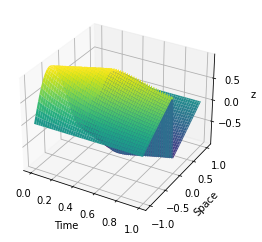

In [80]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(T, X, usol, cmap='viridis')
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('z')

In [97]:
T[0][...]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [98]:
X[0][...]

array([-1.        , -0.99215686, -0.98431373, -0.97647059, -0.96862745,
       -0.96078431, -0.95294118, -0.94509804, -0.9372549 , -0.92941176,
       -0.92156863, -0.91372549, -0.90588235, -0.89803922, -0.89019608,
       -0.88235294, -0.8745098 , -0.86666667, -0.85882353, -0.85098039,
       -0.84313725, -0.83529412, -0.82745098, -0.81960784, -0.81176471,
       -0.80392157, -0.79607843, -0.78823529, -0.78039216, -0.77254902,
       -0.76470588, -0.75686275, -0.74901961, -0.74117647, -0.73333333,
       -0.7254902 , -0.71764706, -0.70980392, -0.70196078, -0.69411765,
       -0.68627451, -0.67843137, -0.67058824, -0.6627451 , -0.65490196,
       -0.64705882, -0.63921569, -0.63137255, -0.62352941, -0.61568627,
       -0.60784314, -0.6       , -0.59215686, -0.58431373, -0.57647059,
       -0.56862745, -0.56078431, -0.55294118, -0.54509804, -0.5372549 ,
       -0.52941176, -0.52156863, -0.51372549, -0.50588235, -0.49803922,
       -0.49019608, -0.48235294, -0.4745098 , -0.46666667, -0.45

In [99]:
usol[0][...]

array([ 1.22464680e-16,  2.46374492e-02,  4.92599411e-02,  7.38525275e-02,
        9.84002783e-02,  1.22888291e-01,  1.47301698e-01,  1.71625679e-01,
        1.95845467e-01,  2.19946358e-01,  2.43913720e-01,  2.67733003e-01,
        2.91389747e-01,  3.14869589e-01,  3.38158275e-01,  3.61241666e-01,
        3.84105749e-01,  4.06736643e-01,  4.29120609e-01,  4.51244057e-01,
        4.73093557e-01,  4.94655843e-01,  5.15917826e-01,  5.36866598e-01,
        5.57489439e-01,  5.77773831e-01,  5.97707459e-01,  6.17278221e-01,
        6.36474236e-01,  6.55283850e-01,  6.73695644e-01,  6.91698439e-01,
        7.09281308e-01,  7.26433574e-01,  7.43144825e-01,  7.59404917e-01,
        7.75203976e-01,  7.90532412e-01,  8.05380919e-01,  8.19740483e-01,
        8.33602385e-01,  8.46958211e-01,  8.59799851e-01,  8.72119511e-01,
        8.83909710e-01,  8.95163291e-01,  9.05873422e-01,  9.16033601e-01,
        9.25637660e-01,  9.34679767e-01,  9.43154434e-01,  9.51056516e-01,
        9.58381215e-01,  

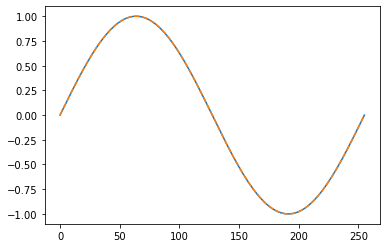

In [123]:
# usol[time][space]
plt.plot(usol[0][...])
plt.plot(-1 * np.sin(np.pi * np.linspace(-1,1,256)), '--')

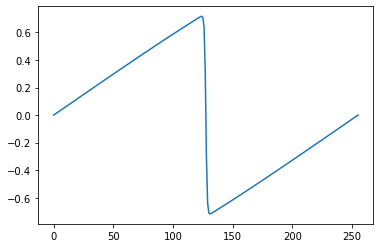

In [113]:
# usol[time][space]
plt.plot(usol[99][...])

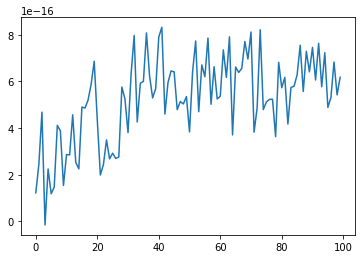

In [108]:
# usol[time][space]
plt.plot(usol.T[0][...])

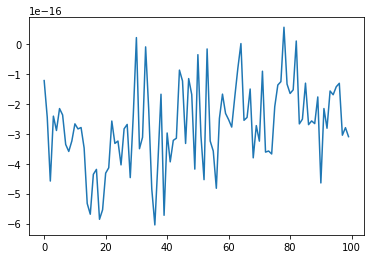

In [111]:
# usol[time][space]
plt.plot(usol.T[255][...])

In [ ]:
#path = 'D:/Math PhD/PINNs code and papers/PINNs/BurgersEquation/Example1/Burgers.mat'
#data = scipy.io.loadmat(path) 
#X = data['x'][...,0]                                   
#T = data['t'][...,0]                                   
#usol = data['usol'].T

#fig = go.Figure(data=[go.Surface(z=usol, x=X, y=T)])
#fig.update_layout(
#    title='Given data (.mat)',
#    scene = dict(xaxis = dict(title='space', nticks=4, range=[-1,1],),
#                 yaxis = dict(title='time', nticks=4, range=[0,1])))
#fig.show()
